In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from soilgasflux_fcs import json_reader, visualization
from soilgasflux_fcs import hm_model, linear_model, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
a = [0.000158, 0.00900, 0.00001,0.00316]
cs = [2.00e4, 1.00e3, 3.16e5,1.58e+3]
c0 = [430, 430, 430,430]
t0 = [0, 0, 0,0]
t = np.arange(120)

In [36]:
e = 2.71828
# cx+(c0-cx)*e**(-a*(t-t0))
# 10000+(430-10000)*e**(-0.01*(t))

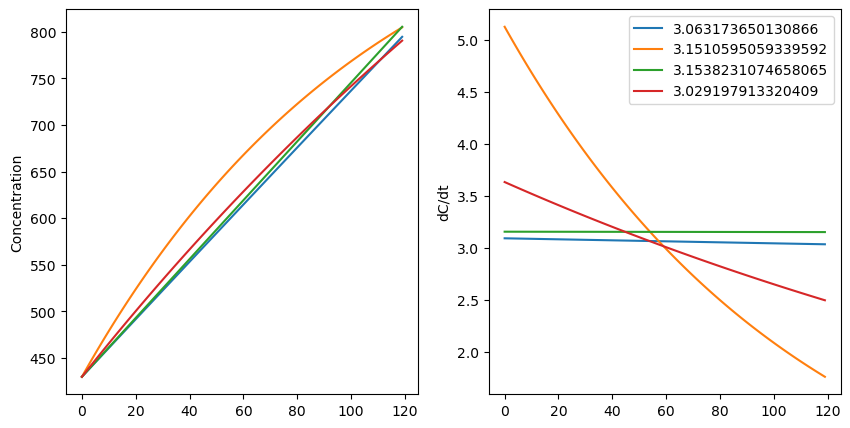

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i, (a_i, cs_i, c0_i, t0_i) in enumerate(zip(a, cs, c0, t0)):
    if i == 1:
        # continue
        pass
    # print(models.hm_model(t=t, cx=cs_i, a=a_i, t0=t0_i, c0=c0_i))
    cc = models.hm_model(t=t, cx=cs_i, a=a_i, t0=t0_i, c0=c0_i)
    dcdt = models.hm_model_dcdt(t0=t0_i, c0=c0_i, a=a_i, cx=cs_i, t=t)

    ax[0].plot(cc)

    ax[1].plot(dcdt, label=f'{dcdt.mean()}')
    ax[1].legend()
    ax[0].set_ylabel('Concentration')
    ax[1].set_ylabel('dC/dt')

In [ ]:
def final_ab(a, b):
    return a*b

def final_ab2(a, b):
    return a**b

def final_ab3(a, b):
    return a*(b)*2.71828**(-a*10)

/var/folders/3c/hcr1f3154x1g591jwk643gyc0000gn/T/ipykernel_78578/4010218198.py:5: RuntimeWarning: overflow encountered in power
  return a**b


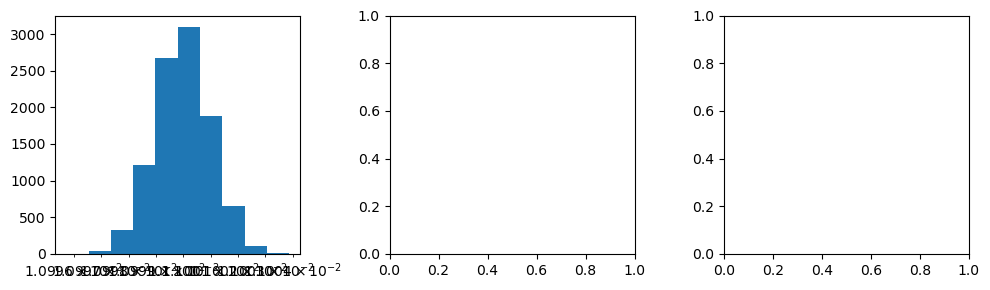

In [87]:
value_a = 1e-2
sigma_a = 1e-3

value_b = 1e5
sigma_b = 1e6

aMC = value_a + sigma_a*np.random.normal(0, sigma_a, 10000)
a2MC = value_a + sigma_a*np.random.lognormal(0, sigma_a, 10000)

bMC = value_b + sigma_b*np.random.normal(0, sigma_b, 10000)
b2MC = value_b + sigma_b*np.random.lognormal(0, sigma_b, 10000)

a1b1 = final_ab2(aMC, bMC)
a2b1 = final_ab2(a2MC, bMC)

# plt.hist(ab1, bins=30, alpha=0.5, label='ab1')
# plt.hist(ab2)
fig, ax =plt.subplots(1, 3, figsize=(10, 3))
# ax[0].hist(aMC)
ax[0].hist(a2MC)
# ax[0].axvline(value_a, color='r')

# ax[1].hist(bMC)
# ax[1].hist(b2MC)
# ax[1].axvline(value_b, color='r')

# ax[2].hist(a1b1)
# ax[2].hist(a2b1)

ax[0].set_xscale('log')
ax[0].tick_params(axis='x', rotation=90)
# ax[1].set_xscale('log')
# plt.hist(a_mc1, bins=30, alpha=0.5, label='randn')
# plt.hist(a_mc2, bins=30, alpha=0.5, label='normal')
fig.tight_layout()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [119]:
def linear_signal_response(total_ResponseTime, sampling_frequency,start, end):
    """
    Simulate a linear signal response over a given time period.
    
    Parameters:
    total_ResponseTime (int): Total time for the response.
    start (int): Start time of the response.
    end (int): End time of the response.
    
    Returns:
    np.ndarray: Simulated linear response signal.
    """
    sampling_period = 1 / sampling_frequency  # Sampling period in seconds
    
    # Create the linear ramp
    response_signal= np.linspace(start, end, total_ResponseTime+1)
    diff = np.diff(response_signal)
    
    return response_signal[1:], diff

In [120]:
linear_signal_response(total_ResponseTime=5, sampling_frequency=1,start=100,end=101)

(array([100.2, 100.4, 100.6, 100.8, 101. ]), array([0.2, 0.2, 0.2, 0.2, 0.2]))

In [121]:
def logcurve_signal_response(total_responseTime, sampling_frequency, start, end):
    """
    Simulate a logarithmic curve response over a given time period.
    
    Parameters:
    total_responseTime (int): Total time for the response.
    sampling_frequency (int): Sampling frequency.
    start (int): Start time of the response.
    end (int): End time of the response.
    
    Returns:
    np.ndarray: Simulated logarithmic response signal.
    """
    sampling_period = 1 / sampling_frequency  # Sampling period in seconds
    
    # Create the logarithmic curve
    t = np.linspace(0, total_responseTime, total_responseTime+1)
    response_signal = start + (end - start) * np.log10(t + 1) / np.log10(total_responseTime + 1)
    diff = np.diff(response_signal)
    
    return response_signal[1:], diff

In [122]:
logcurve_signal_response(total_responseTime=5, sampling_frequency=1,start=100,end=101)

(array([100.38685281, 100.61314719, 100.77370561, 100.8982444 ,
        101.        ]),
 array([0.38685281, 0.22629439, 0.16055842, 0.12453879, 0.1017556 ]))

/var/folders/3c/hcr1f3154x1g591jwk643gyc0000gn/T/ipykernel_51978/2384420652.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


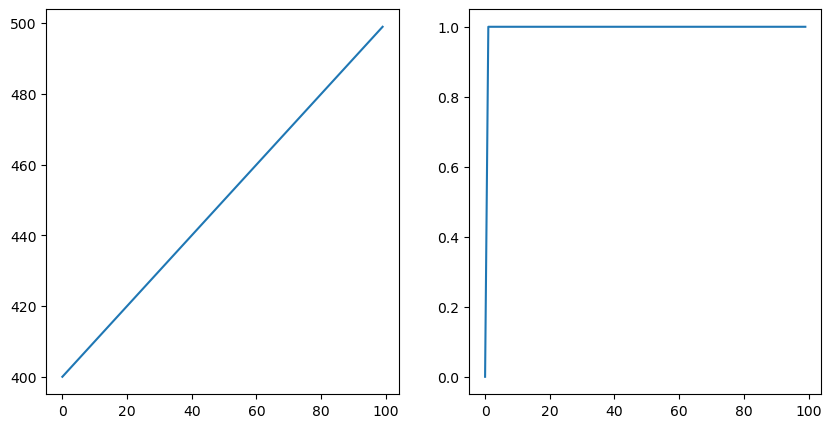

In [152]:
data = np.arange(400, 500, 1)
diff = np.concatenate([np.array([0]),np.diff(data)])
time = np.arange(0, 100, 1)

sampling_rate = 1 #Hz
response_time = 20 #s

a = np.zeros((time.shape[0], time.shape[0]+response_time))
b = np.zeros((time.shape[0], time.shape[0]+response_time))
# print(a)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(time, data)

ax[1].plot(time, diff)  
fig.show()

In [153]:
print(a.shape)

(100, 120)


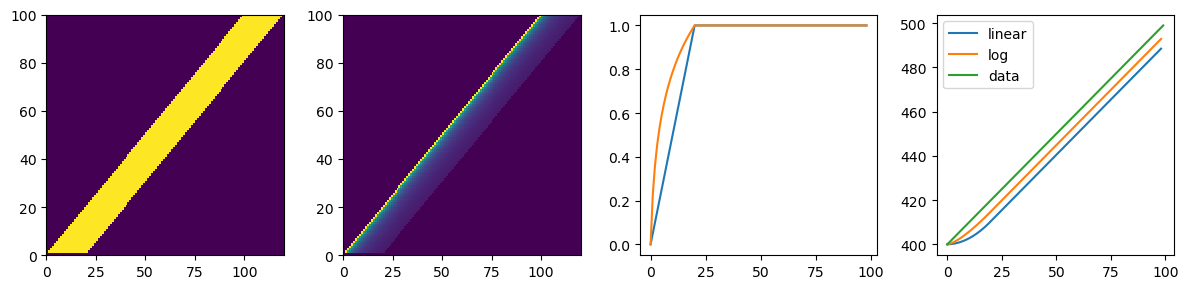

In [154]:
for t in time:
    # print(t)
    if t == 0:
        a[t, 0:response_time] = linear_signal_response(total_ResponseTime=response_time, sampling_frequency=sampling_rate,
                                      start=0, end=0)[1]
        b[t, 0:response_time] = logcurve_signal_response(total_responseTime=response_time, sampling_frequency=sampling_rate,
                                        start=0, end=0)[1]
    a[t,t:t+response_time] = linear_signal_response(total_ResponseTime=response_time, sampling_frequency=sampling_rate,
                                  start=0, end=diff[t])[1]
    b[t,t:t+response_time] = logcurve_signal_response(total_responseTime=response_time, sampling_frequency=sampling_rate,
                                    start=0, end=diff[t])[1]

cumulative_a = a.sum(axis=0)[:time.max()]
cumulative_b = b.sum(axis=0)[:time.max()]

fig, ax = plt.subplots(1, 4, figsize=(12, 3))
ax[0].pcolormesh(a)
ax[1].pcolormesh(b)

ax[2].plot(cumulative_a)
ax[2].plot(cumulative_b)

ax[3].plot(cumulative_a.cumsum()+400, label='linear')
ax[3].plot(cumulative_b.cumsum()+400, label='log')
ax[3].plot(data, label='data')

ax[3].legend()
fig.tight_layout()